In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,50.472433,19.233789,18.0,szambo,asfaltowa,żywopłot,wodociąg na działce,na działce,brak,229000.0
2,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
3,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
4,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
...,...,...,...,...,...,...,...,...,...,...
7624,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7625,49.907755,20.200424,35.2,brak,polna,brak,brak,brak,brak,315000.0
7626,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7627,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   localization_y  7629 non-null   float64
 1   localization_x  7629 non-null   float64
 2   area            7629 non-null   float64
 3   sewers          7629 non-null   object 
 4   road            7629 non-null   object 
 5   fence           7629 non-null   object 
 6   water           7629 non-null   object 
 7   electricity     7629 non-null   object 
 8   gas             7629 non-null   object 
 9   price           7629 non-null   float64
dtypes: float64(4), object(6)
memory usage: 596.1+ KB


## creating dummy variables

In [5]:
dummies = pd.get_dummies(frame[['sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   localization_y                           7629 non-null   float64
 1   localization_x                           7629 non-null   float64
 2   area                                     7629 non-null   float64
 3   price                                    7629 non-null   float64
 4   sewers_miejska                           7629 non-null   uint8  
 5   sewers_przydomowa oczyszczalnia ścieków  7629 non-null   uint8  
 6   sewers_szambo                            7629 non-null   uint8  
 7   road_kostka brukowa                      7629 non-null   uint8  
 8   road_polna                               7629 non-null   uint8  
 9   road_utwardzana                          7629 non-null   uint8  
 10  fence_brak                               7629 no


#### adjustments for better training

In [7]:
frame = frame.drop(['water_wodociąg na działce','water_wodociąg w drodze','water_własne ujęcie/studnia',
                    'electricity_na działce','electricity_w drodze','gas_na działce','gas_w drodze',
                    'sewers_miejska','sewers_przydomowa oczyszczalnia ścieków','sewers_szambo'],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   localization_y       7629 non-null   float64
 1   localization_x       7629 non-null   float64
 2   area                 7629 non-null   float64
 3   price                7629 non-null   float64
 4   road_kostka brukowa  7629 non-null   uint8  
 5   road_polna           7629 non-null   uint8  
 6   road_utwardzana      7629 non-null   uint8  
 7   fence_brak           7629 non-null   uint8  
 8   fence_drewniane      7629 non-null   uint8  
 9   fence_inne           7629 non-null   uint8  
 10  fence_metalowe       7629 non-null   uint8  
 11  fence_mieszane       7629 non-null   uint8  
 12  fence_murowane       7629 non-null   uint8  
 13  fence_siatka         7629 non-null   uint8  
 14  fence_żywopłot       7629 non-null   uint8  
dtypes: float64(4), uint8(11)
memory usage:

## train test split

In [9]:
X = frame.drop('price',axis=1).values
y = frame['price'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train= scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(5721, 14)

In [17]:
X_test.shape

(1908, 14)

## creating model 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(8,activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [21]:
# from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=4000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5721 samples, validate on 1908 samples
Epoch 1/4000
5721/5721 [==============================] - 1s 104us/sample - loss: 3240811419097.0698 - val_loss: 2759781237457.3081
Epoch 2/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 3240811344224.9678 - val_loss: 2759781075197.3164
Epoch 3/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 3240811285894.3765 - val_loss: 2759780945121.4087
Epoch 4/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 3240810923610.6582 - val_loss: 2759780775888.7715
Epoch 5/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 3240810569935.6284 - val_loss: 2759780422825.5933
Epoch 6/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 3240810035521.1079 - val_loss: 2759779601564.7129
Epoch 7/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 3240809072539.4077 - val_loss: 2759778430228.9307
Epoch 8/4000
5721/5721 [================

5721/5721 [==============================] - 0s 6us/sample - loss: 2898012752284.0342 - val_loss: 2415549314578.2476
Epoch 126/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2897801498540.2329 - val_loss: 2415201869325.9541
Epoch 127/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2897561878190.0674 - val_loss: 2414875233883.2368
Epoch 128/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2897380611055.3540 - val_loss: 2414524612951.4800
Epoch 129/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2897126676856.9521 - val_loss: 2414195302348.4780
Epoch 130/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2896892637044.3882 - val_loss: 2413853786455.4800
Epoch 131/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2896672045274.0093 - val_loss: 2413528368924.4443
Epoch 132/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 289650056

5721/5721 [==============================] - 0s 6us/sample - loss: 2872675815305.8667 - val_loss: 2374926328203.0020
Epoch 250/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2872363874719.6143 - val_loss: 2374564244310.4067
Epoch 251/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2872136769889.6836 - val_loss: 2374200259015.1113
Epoch 252/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2871923564184.5889 - val_loss: 2373861280066.0127
Epoch 253/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2871757650659.2275 - val_loss: 2373521172441.3584
Epoch 254/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2871560293617.4570 - val_loss: 2373157378979.6899
Epoch 255/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2871362890754.3271 - val_loss: 2372811990967.0103
Epoch 256/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 287114430

5721/5721 [==============================] - 0s 7us/sample - loss: 2846552642248.3789 - val_loss: 2328452782599.5137
Epoch 374/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2846313012396.0088 - val_loss: 2328052266342.5073
Epoch 375/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2846093846099.4990 - val_loss: 2327703755340.2095
Epoch 376/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2845903381392.1313 - val_loss: 2327323757552.9727
Epoch 377/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2845630328448.9619 - val_loss: 2326848111072.8721
Epoch 378/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2845430886982.0742 - val_loss: 2326463422652.9141
Epoch 379/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2845241697758.0815 - val_loss: 2326053821691.1699
Epoch 380/4000
5721/5721 [==============================] - ETA: 0s - loss: 6276875550720.0

Epoch 435/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833777780768.5762 - val_loss: 2302761196657.7778
Epoch 436/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833569648650.7393 - val_loss: 2302205329408.0000
Epoch 437/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833369990042.1548 - val_loss: 2301795422336.8052
Epoch 438/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833117680090.6807 - val_loss: 2301395638104.5532
Epoch 439/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2832905864886.3008 - val_loss: 2301000928447.0610
Epoch 440/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2832737144516.2622 - val_loss: 2300548723520.9390
Epoch 441/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2832517590880.3413 - val_loss: 2300164304561.1069
Epoch 442/4000
5721/5721 [==============================] - 0s 6us/sample - 

5721/5721 [==============================] - 0s 8us/sample - loss: 2822456497418.8735 - val_loss: 2277484402589.2495
Epoch 498/4000
5721/5721 [==============================] - 0s 11us/sample - loss: 2822308639937.8457 - val_loss: 2277124298928.0337
Epoch 499/4000
5721/5721 [==============================] - 0s 14us/sample - loss: 2822176762318.1514 - val_loss: 2276712098440.3188
Epoch 500/4000
5721/5721 [==============================] - 0s 11us/sample - loss: 2821976658102.5693 - val_loss: 2276440556619.1362
Epoch 501/4000
5721/5721 [==============================] - 0s 15us/sample - loss: 2821812045016.0405 - val_loss: 2275963073173.1992
Epoch 502/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2821638008383.0938 - val_loss: 2275629316495.2954
Epoch 503/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2821535111542.0884 - val_loss: 2275200712532.2598
Epoch 504/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 282

Epoch 559/4000
5721/5721 [==============================] - 0s 11us/sample - loss: 2813208337886.4395 - val_loss: 2254690816369.2412
Epoch 560/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2813031431518.9985 - val_loss: 2254245441578.9351
Epoch 561/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2812846546358.3457 - val_loss: 2253990304503.9497
Epoch 562/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2812756287626.8960 - val_loss: 2253693024758.3398
Epoch 563/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2812571286956.3223 - val_loss: 2253261272800.3354
Epoch 564/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2812430694068.1533 - val_loss: 2252882876832.4697
Epoch 565/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2812341944354.3657 - val_loss: 2252500185955.2871
Epoch 566/4000
5721/5721 [==============================] - 0s 7us/sample -

Epoch 621/4000
5721/5721 [==============================] - 0s 13us/sample - loss: 2804895541778.8833 - val_loss: 2234036211531.6729
Epoch 622/4000
5721/5721 [==============================] - 0s 12us/sample - loss: 2804733528350.0254 - val_loss: 2233695298240.1343
Epoch 623/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2804639747067.1675 - val_loss: 2233506487272.3857
Epoch 624/4000
5721/5721 [==============================] - 0s 14us/sample - loss: 2804552324597.7080 - val_loss: 2232925552090.4316
Epoch 625/4000
5721/5721 [==============================] - 0s 17us/sample - loss: 2804331168067.6133 - val_loss: 2232588604207.7651
Epoch 626/4000
5721/5721 [==============================] - 0s 15us/sample - loss: 2804147650554.2725 - val_loss: 2232177383016.1172
Epoch 627/4000
5721/5721 [==============================] - 0s 13us/sample - loss: 2804109870270.2661 - val_loss: 2231749943484.9141
Epoch 628/4000
5721/5721 [==============================] - 0s 15us/s

Epoch 683/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2796143628593.7144 - val_loss: 2212981900294.4404
Epoch 684/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2795942574867.9126 - val_loss: 2212593098837.8701
Epoch 685/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2795842414415.5161 - val_loss: 2212395082878.6582
Epoch 686/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2795612339823.0630 - val_loss: 2211910616482.6162
Epoch 687/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2795446936993.9409 - val_loss: 2211509101488.5703
Epoch 688/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2795415926139.9951 - val_loss: 2211082943790.6919
Epoch 689/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2795119631068.0679 - val_loss: 2210737807342.8262
Epoch 690/4000
5721/5721 [==============================] - 0s 10us/sample -

5721/5721 [==============================] - 0s 7us/sample - loss: 2785734563263.2954 - val_loss: 2189382210283.0691
Epoch 746/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2785574755245.1279 - val_loss: 2189044022299.9077
Epoch 747/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2785445940588.6021 - val_loss: 2188373041890.4822
Epoch 748/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2785073823595.0806 - val_loss: 2187935805998.1553
Epoch 749/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2784942304779.5449 - val_loss: 2187512695140.3606
Epoch 750/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2784656633962.6777 - val_loss: 2187108253661.6521
Epoch 751/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2784505265540.2285 - val_loss: 2186684338682.6331
Epoch 752/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 278428338

5721/5721 [==============================] - 0s 8us/sample - loss: 2773160287054.6216 - val_loss: 2162828258855.7148
Epoch 808/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2772801962920.4741 - val_loss: 2162237801169.3079
Epoch 809/4000
5721/5721 [==============================] - 0s 13us/sample - loss: 2772780515385.2769 - val_loss: 2161893379400.4529
Epoch 810/4000
5721/5721 [==============================] - 0s 11us/sample - loss: 2772400109044.2759 - val_loss: 2161300565475.0190
Epoch 811/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2772191703464.5635 - val_loss: 2160891205018.0291
Epoch 812/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2771876281090.7295 - val_loss: 2160504132021.9373
Epoch 813/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2771628877404.0903 - val_loss: 2160035284317.9204
Epoch 814/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 277

5721/5721 [==============================] - 0s 8us/sample - loss: 2756577669702.0742 - val_loss: 2131497966087.5137
Epoch 870/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2756291185126.4941 - val_loss: 2130942686051.2871
Epoch 871/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2756194624755.2466 - val_loss: 2130459877977.0903
Epoch 872/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2755685886531.5688 - val_loss: 2129873286021.6353
Epoch 873/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2755526793578.6328 - val_loss: 2129320332307.3210
Epoch 874/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2755109758421.4897 - val_loss: 2128792705852.6458
Epoch 875/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2755004476217.8584 - val_loss: 2128167450508.0754
Epoch 876/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 275449891

5721/5721 [==============================] - 0s 7us/sample - loss: 2704363168361.1562 - val_loss: 2057389627396.2935
Epoch 994/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2703702595998.1821 - val_loss: 2056818867811.8240
Epoch 995/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2703051801203.1802 - val_loss: 2056154134412.0754
Epoch 996/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2702442887887.1807 - val_loss: 2055576614693.0315
Epoch 997/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2701840742895.8013 - val_loss: 2054924179048.1172
Epoch 998/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2701301399663.6895 - val_loss: 2054376607666.7170
Epoch 999/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2700699895289.2876 - val_loss: 2053806750473.1240
Epoch 1000/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 27001283

Epoch 1055/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2660206018617.2769 - val_loss: 2028680594850.6165
Epoch 1056/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2659422406297.6626 - val_loss: 2028569564501.3333
Epoch 1057/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2658448484553.5425 - val_loss: 2028235423057.0398
Epoch 1058/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2657873728254.7915 - val_loss: 2028562188781.7529
Epoch 1059/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2656854794207.0659 - val_loss: 2027822550378.8010
Epoch 1060/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2656066203872.0952 - val_loss: 2027740860682.1970
Epoch 1061/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2654998111976.4185 - val_loss: 2028103593649.1072
Epoch 1062/4000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2533429457535.3511 - val_loss: 2189949725011.1865
Epoch 1178/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531909180373.2212 - val_loss: 2191650782751.1279
Epoch 1179/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530851085065.8892 - val_loss: 2195738911080.6541
Epoch 1180/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529592807944.5020 - val_loss: 2199888567787.6060
Epoch 1181/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2528577890734.6494 - val_loss: 2204057598248.2515
Epoch 1182/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527645038618.1323 - val_loss: 2208866387122.1802
Epoch 1183/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2526255089156.7432 - val_loss: 2211484526519.0103
Epoch 1184/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 25

Epoch 1239/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2466712302951.9482 - val_loss: 2534454114188.0757
Epoch 1240/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2465637134983.9424 - val_loss: 2539867673769.5933
Epoch 1241/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2464812453512.1216 - val_loss: 2549139213743.4971
Epoch 1242/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2463804144521.3296 - val_loss: 2558601327287.5474
Epoch 1243/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2462685526494.6187 - val_loss: 2565020025450.2642
Epoch 1244/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2462113000017.8877 - val_loss: 2574191733830.8428
Epoch 1245/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2460911315168.4531 - val_loss: 2578707045249.3418
Epoch 1246/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 1362/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2395904207665.2666 - val_loss: 3508345143536.4360
Epoch 1363/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2395409002997.8872 - val_loss: 3513667660080.8384
Epoch 1364/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2394817992327.7637 - val_loss: 3516563111558.1719
Epoch 1365/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2394685989237.7305 - val_loss: 3526656516147.5220
Epoch 1366/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2395299525923.2163 - val_loss: 3524339728349.6519
Epoch 1367/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2394049124044.4956 - val_loss: 3534911075308.6792
Epoch 1368/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2393972564066.8022 - val_loss: 3544707372510.7256
Epoch 1369/4000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2377538843389.3599 - val_loss: 4161908283671.0781
Epoch 1485/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2377489543157.2607 - val_loss: 4165123892591.0942
Epoch 1486/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2377141928322.6177 - val_loss: 4170694174887.4468
Epoch 1487/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2377129952346.0317 - val_loss: 4171003466509.4170
Epoch 1488/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2377092384538.5352 - val_loss: 4176974128632.4868
Epoch 1489/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2377021179519.8882 - val_loss: 4184552260957.9204
Epoch 1490/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2376927423275.5391 - val_loss: 4190512330052.1592
Epoch 1491/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 23

Epoch 1546/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2374487100462.7163 - val_loss: 4394718099649.2080
Epoch 1547/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2374363253557.5630 - val_loss: 4396202644409.1572
Epoch 1548/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2374860825848.9746 - val_loss: 4395570808054.8765
Epoch 1549/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2374335390092.6411 - val_loss: 4398775269878.3398
Epoch 1550/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2374491838740.7183 - val_loss: 4401682630394.0967
Epoch 1551/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2374206217966.5034 - val_loss: 4406859031129.0898
Epoch 1552/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2374339813199.8740 - val_loss: 4409757561493.1992
Epoch 1553/4000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 6us/sample - loss: 2373291372332.7920 - val_loss: 4618417280375.6816
Epoch 1669/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2373413907212.0371 - val_loss: 4610740055179.5391
Epoch 1670/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2373185344907.7461 - val_loss: 4626859773290.8008
Epoch 1671/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2373000915469.1558 - val_loss: 4632749547708.9141
Epoch 1672/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2373001201612.0928 - val_loss: 4622349651650.2812
Epoch 1673/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372757547183.7681 - val_loss: 4625401203525.2324
Epoch 1674/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372771721852.4873 - val_loss: 4628674746440.9893
Epoch 1675/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 23

Epoch 1730/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372487662306.5117 - val_loss: 4691554630477.8193
Epoch 1731/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2373202086887.1206 - val_loss: 4699409152571.0352
Epoch 1732/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2373117871271.3555 - val_loss: 4668275087329.9453
Epoch 1733/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372694842047.4297 - val_loss: 4666159890088.5195
Epoch 1734/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372750283696.3496 - val_loss: 4666800944967.3799
Epoch 1735/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372522721254.2256 - val_loss: 4669827003784.8555
Epoch 1736/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372895258601.4473 - val_loss: 4669723403871.5303
Epoch 1737/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 1853/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372376582372.0327 - val_loss: 4781700077263.1611
Epoch 1854/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372698196849.7031 - val_loss: 4791968238645.6689
Epoch 1855/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372392993704.4741 - val_loss: 4787517437767.3799
Epoch 1856/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372500950449.3340 - val_loss: 4786235576895.3291
Epoch 1857/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372462616683.3940 - val_loss: 4784173958425.2246
Epoch 1858/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372394567003.7769 - val_loss: 4781636591839.2617
Epoch 1859/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372521398087.9985 - val_loss: 4787622823742.7920
Epoch 1860/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 1976/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372284661974.7876 - val_loss: 4802059979692.2764
Epoch 1977/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372254031186.1113 - val_loss: 4799036788418.2812
Epoch 1978/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372410639298.2485 - val_loss: 4803209764812.4775
Epoch 1979/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372454970621.9863 - val_loss: 4796911320091.9082
Epoch 1980/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372294302376.5186 - val_loss: 4805056390854.5742
Epoch 1981/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372364964389.1406 - val_loss: 4804238117666.8848
Epoch 1982/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372908717938.5981 - val_loss: 4799356009465.5596
Epoch 1983/4000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2372350794660.5361 - val_loss: 4814386317599.6650
Epoch 2099/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2373192410469.8003 - val_loss: 4793487816485.0312
Epoch 2100/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372622207914.9800 - val_loss: 4803445385795.6230
Epoch 2101/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372245021801.7827 - val_loss: 4798768569766.9102
Epoch 2102/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372487287464.8770 - val_loss: 4795875856478.4570
Epoch 2103/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372390466266.9937 - val_loss: 4792608385775.3623
Epoch 2104/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372608084339.9404 - val_loss: 4788752440296.3857
Epoch 2105/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 23

Epoch 2160/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372616431319.2354 - val_loss: 4754476552836.0254
Epoch 2161/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372339674188.7866 - val_loss: 4759608825242.0293
Epoch 2162/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372310205275.1504 - val_loss: 4760309783665.7773
Epoch 2163/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372773054071.2969 - val_loss: 4768089857172.1260
Epoch 2164/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2373009642674.0947 - val_loss: 4734760832981.0654
Epoch 2165/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372657453344.1733 - val_loss: 4741005138130.3818
Epoch 2166/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372547331912.3564 - val_loss: 4735567421079.3457
Epoch 2167/4000
5721/5721 [==============================] - 0s 6us/s

Epoch 2283/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372501046977.7563 - val_loss: 4748995290891.2705
Epoch 2284/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372251266663.1875 - val_loss: 4743037309194.1973
Epoch 2285/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372589905889.5718 - val_loss: 4745206192029.2490
Epoch 2286/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2372294389253.8174 - val_loss: 4744777981350.9102
Epoch 2287/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372301147274.3589 - val_loss: 4739581099276.3438
Epoch 2288/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372362741995.9082 - val_loss: 4738182966480.2344
Epoch 2289/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372621744431.9248 - val_loss: 4749972022810.8340
Epoch 2290/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 2406/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372195927313.3174 - val_loss: 4768871727756.6123
Epoch 2407/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372341272707.0205 - val_loss: 4766873748692.5283
Epoch 2408/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372504679340.0537 - val_loss: 4774657562319.1611
Epoch 2409/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372211005421.7432 - val_loss: 4777541960057.8281
Epoch 2410/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372599217683.4204 - val_loss: 4779618793836.9473
Epoch 2411/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372151555895.8896 - val_loss: 4772552866569.1240
Epoch 2412/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372092205097.8838 - val_loss: 4772618652897.4092
Epoch 2413/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 2529/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372540674160.4053 - val_loss: 4715751005469.5176
Epoch 2530/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372356706463.6587 - val_loss: 4723952082789.4336
Epoch 2531/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372361632145.2949 - val_loss: 4721249114871.9492
Epoch 2532/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372410401158.9136 - val_loss: 4725985819023.2959
Epoch 2533/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372592900911.1191 - val_loss: 4730411767159.6816
Epoch 2534/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372803043601.4966 - val_loss: 4725143246302.7256
Epoch 2535/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372975794979.6636 - val_loss: 4727557390129.9121
Epoch 2536/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 2652/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2373109402384.3330 - val_loss: 4767915835254.6084
Epoch 2653/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372479406236.7949 - val_loss: 4775142338190.7588
Epoch 2654/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372279413899.7910 - val_loss: 4770232615083.7402
Epoch 2655/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372356664812.0425 - val_loss: 4768340184220.7129
Epoch 2656/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372318819415.8838 - val_loss: 4772037407724.6797
Epoch 2657/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372966948358.5332 - val_loss: 4777025472868.3604
Epoch 2658/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372335013417.6152 - val_loss: 4774362612673.7441
Epoch 2659/4000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2372491931287.8726 - val_loss: 4796277450919.4463
Epoch 2775/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372556830405.3359 - val_loss: 4790400810973.6523
Epoch 2776/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372408791168.1567 - val_loss: 4799647923743.1279
Epoch 2777/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372622656529.0039 - val_loss: 4801163201486.6250
Epoch 2778/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372197132581.1851 - val_loss: 4804429524176.2344
Epoch 2779/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372106559091.3589 - val_loss: 4797042418059.0020
Epoch 2780/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372205992115.3477 - val_loss: 4795003639503.1611
Epoch 2781/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 23

Epoch 2897/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372122468656.9980 - val_loss: 4741971241917.4512
Epoch 2898/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372236278187.0693 - val_loss: 4745102490823.6475
Epoch 2899/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372176181875.5376 - val_loss: 4743551166700.1426
Epoch 2900/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372447909613.4302 - val_loss: 4743680527035.8408
Epoch 2901/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372389610656.1958 - val_loss: 4745850678583.2793
Epoch 2902/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372130885078.5640 - val_loss: 4747816322844.4443
Epoch 2903/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372205479503.2031 - val_loss: 4752868663038.3896
Epoch 2904/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 3020/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372080658132.3716 - val_loss: 4791359880288.6035
Epoch 3021/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372129456460.2046 - val_loss: 4791477659575.0107
Epoch 3022/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372246384196.8218 - val_loss: 4797540343103.8662
Epoch 3023/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372204153112.2979 - val_loss: 4797394358950.3730
Epoch 3024/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372027101577.0610 - val_loss: 4789110931181.2158
Epoch 3025/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372042097281.4990 - val_loss: 4788507300690.1133
Epoch 3026/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372557284088.3481 - val_loss: 4786722647591.7148
Epoch 3027/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 3143/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372143552805.9014 - val_loss: 4785368552858.0293
Epoch 3144/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372042416908.3950 - val_loss: 4792301314443.0020
Epoch 3145/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372047564709.0732 - val_loss: 4789110227974.4404
Epoch 3146/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372147193295.7622 - val_loss: 4793571251197.8535
Epoch 3147/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372278855125.4897 - val_loss: 4799294929467.0352
Epoch 3148/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372335520751.7119 - val_loss: 4791955079683.2197
Epoch 3149/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372190172740.4639 - val_loss: 4801154936119.2793
Epoch 3150/4000
5721/5721 [==============================] - 0s 7us/s

Epoch 3266/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372051730936.0352 - val_loss: 4789139541766.9766
Epoch 3267/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2371979486998.2397 - val_loss: 4788999271267.2871
Epoch 3268/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372300646045.9585 - val_loss: 4786659714827.2705
Epoch 3269/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372121199611.5254 - val_loss: 4788940896140.0752
Epoch 3270/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372365739342.8896 - val_loss: 4793913031227.0352
Epoch 3271/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372099322363.6147 - val_loss: 4790010638207.1953
Epoch 3272/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2371983422182.4492 - val_loss: 4788579508859.4385
Epoch 3273/4000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2372318401387.6177 - val_loss: 4795206864646.9766
Epoch 3389/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372477734696.4966 - val_loss: 4777638580455.8486
Epoch 3390/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372582349603.6636 - val_loss: 4779738497333.1318
Epoch 3391/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372317624280.2642 - val_loss: 4782161694574.0205
Epoch 3392/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372086135938.4839 - val_loss: 4778614378556.1094
Epoch 3393/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372268439517.9922 - val_loss: 4785428771786.3311
Epoch 3394/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372003710803.8120 - val_loss: 4782896862102.8096
Epoch 3395/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 23

Epoch 3511/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2371983189547.4053 - val_loss: 4758602740682.3311
Epoch 3512/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372283293382.4102 - val_loss: 4757408648760.8887
Epoch 3513/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2371956502660.4521 - val_loss: 4757740134142.3896
Epoch 3514/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372459267749.1182 - val_loss: 4759481809570.0801
Epoch 3515/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372062458896.2881 - val_loss: 4760968168557.4844
Epoch 3516/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372146723770.0151 - val_loss: 4766249664649.3916
Epoch 3517/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372064891918.8560 - val_loss: 4765907829113.8281
Epoch 3518/4000
5721/5721 [==============================] - 0s 6us/s

5721/5721 [==============================] - 0s 8us/sample - loss: 2372048180868.8999 - val_loss: 4779553090321.7109
Epoch 3634/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2372211510636.6021 - val_loss: 4779624008105.0566
Epoch 3635/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2372136234413.0381 - val_loss: 4779523771136.5371
Epoch 3636/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2371865341271.1230 - val_loss: 4778446715347.9912
Epoch 3637/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2372029195338.2808 - val_loss: 4784319993001.5938
Epoch 3638/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2372335088014.7891 - val_loss: 4800345650500.1592
Epoch 3639/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2373097147266.8862 - val_loss: 4786451152105.9961
Epoch 3640/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 23

5721/5721 [==============================] - 0s 8us/sample - loss: 2371865921128.9775 - val_loss: 4808679229933.7529
Epoch 3756/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2372057216073.5649 - val_loss: 4800603065603.7568
Epoch 3757/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2372240280344.9243 - val_loss: 4803120434538.8008
Epoch 3758/4000
5721/5721 [==============================] - 0s 11us/sample - loss: 2372283993590.0659 - val_loss: 4791672358203.5723
Epoch 3759/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2372640243139.2329 - val_loss: 4800620464587.4043
Epoch 3760/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2372184244441.6514 - val_loss: 4793145255691.2705
Epoch 3761/4000
5721/5721 [==============================] - 0s 10us/sample - loss: 2371998231932.3530 - val_loss: 4796325732643.9580
Epoch 3762/4000
5721/5721 [==============================] - 0s 9us/sample - loss:

5721/5721 [==============================] - 0s 7us/sample - loss: 2371834343487.7207 - val_loss: 4809932353819.3711
Epoch 3878/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372091817890.2095 - val_loss: 4804436463470.0205
Epoch 3879/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2372340880155.4302 - val_loss: 4816211141071.6982
Epoch 3880/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2372328305491.2749 - val_loss: 4813760476484.1592
Epoch 3881/4000
5721/5721 [==============================] - 0s 9us/sample - loss: 2372240825825.3032 - val_loss: 4806412835129.4258
Epoch 3882/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2372845512464.5117 - val_loss: 4815404954673.3750
Epoch 3883/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 2372310627352.8794 - val_loss: 4811626182814.8594
Epoch 3884/4000
5721/5721 [==============================] - 0s 8us/sample - loss: 23

Epoch 3939/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372029565483.2261 - val_loss: 4774677290681.6943
Epoch 3940/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372129767083.2036 - val_loss: 4774246580395.7402
Epoch 3941/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372276992681.9507 - val_loss: 4775557652497.1738
Epoch 3942/4000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372142217073.1665 - val_loss: 4784474385513.1904
Epoch 3943/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372299734544.5566 - val_loss: 4779328953904.3018
Epoch 3944/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372146664167.8813 - val_loss: 4781663537370.9688
Epoch 3945/4000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372052034078.6968 - val_loss: 4773366563262.5244
Epoch 3946/4000
5721/5721 [==============================] - 0s 6us/s

In [24]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

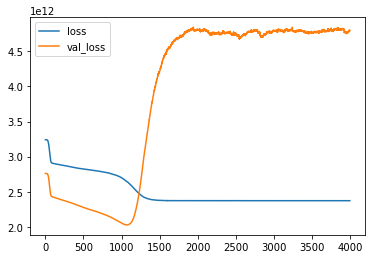

In [25]:
losses.plot()

## model ewaluation

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [27]:
X_test

array([[0.22111013, 0.47437944, 0.00285727, ..., 0.        , 0.        ,
        0.        ],
       [0.7564522 , 0.07608024, 0.00236677, ..., 0.        , 0.        ,
        0.        ],
       [0.51443804, 0.71160471, 0.00390731, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17231896, 0.47931436, 0.0071003 , ..., 0.        , 0.        ,
        0.        ],
       [0.7085659 , 0.39315687, 0.00472163, ..., 0.        , 0.        ,
        0.        ],
       [0.5093109 , 0.64782719, 0.00977185, ..., 0.        , 0.        ,
        0.        ]])

In [28]:
predictions = model.predict(X_test)

In [29]:
mean_absolute_error(y_test,predictions)

523441.1931102728

In [30]:
np.sqrt(mean_squared_error(y_test,predictions))

2190761.7328542965

In [31]:
explained_variance_score(y_test,predictions)

-0.9818695336698653

In [32]:
frame['price'].mean()

584114.2509896448

In [33]:
frame['price'].median()

212750.0

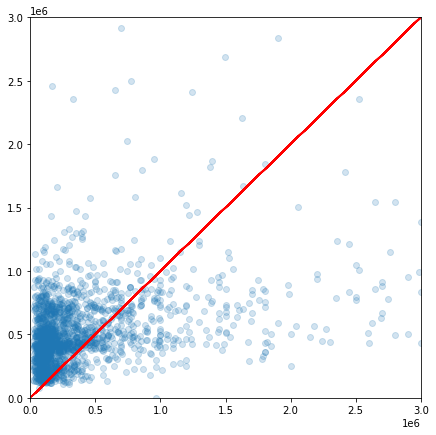

In [34]:
plt.figure(figsize=(7,7))
plt.xlim(0,3000000)
plt.ylim(0,3000000)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [35]:
errors = y_test.reshape(1908, 1) - predictions

<AxesSubplot:ylabel='Count'>

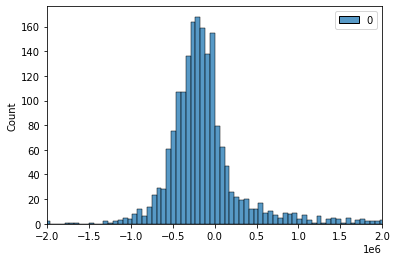

In [36]:
plt.xlim(-2000000,2000000)

sns.histplot(errors)